In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:

math_data = pd.read_csv("math_success.csv")
portuguese_data = pd.read_csv("portuguese_success.csv")

math_df = pd.DataFrame(math_data)
portuguese_df = pd.DataFrame(portuguese_data)

In [3]:

math_df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
math_df = pd.get_dummies(math_df, columns=['school', 'sex', 'address', 'famsize', 'pstatus',
                                     'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
                                     'famsup', 'paid', 'activities', 'nursery', 'higher',
                                     'internet', 'romantic'], drop_first=True)

In [5]:
features = math_df.drop(columns=['g3']) 
target = math_df['g3']

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np  

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

# Initialize linear regression model
model = linear_model.LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predict target values on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)


print('R-Squared (R\u00b2): {:.2f}%'.format(r2 * 100))
print("Mean Absolute Error:", mae)
print('Mean Squared Error (MSE): {:.2f}'.format(mse))

R-Squared (R²): 78.03%
Mean Absolute Error: 1.5262519572177933
Mean Squared Error (MSE): 4.82


In [14]:
def predict_grade(new_student_data):
    new_student_features = pd.DataFrame(new_student_data)
    new_student_features_encoded = pd.get_dummies(new_student_features, drop_first=True)
    new_student_features_encoded = new_student_features_encoded.align(features, join='right', axis=1, fill_value=0)[0]
    predicted_grade = model.predict(new_student_features_encoded)
    return predicted_grade[0]

In [15]:
#New studnet input
g1_input = int(input("Enter g1 (first-period grade): "))
g2_input = int(input("Enter g2 (second-period grade): "))
studytime_input = int(input("Enter weekly study time (hours): "))

Enter g1 (first-period grade):  12
Enter g2 (second-period grade):  16
Enter weekly study time (hours):  8


In [16]:
new_student_data = {
    'g1': [g1_input],
    'g2': [g2_input],
    'studytime': [studytime_input],
}

In [17]:
predicted_grade = predict_grade(new_student_data)
print("Predicted Final Grade for the New Student:", predicted_grade)

Predicted Final Grade for the New Student: 14.035330651595853


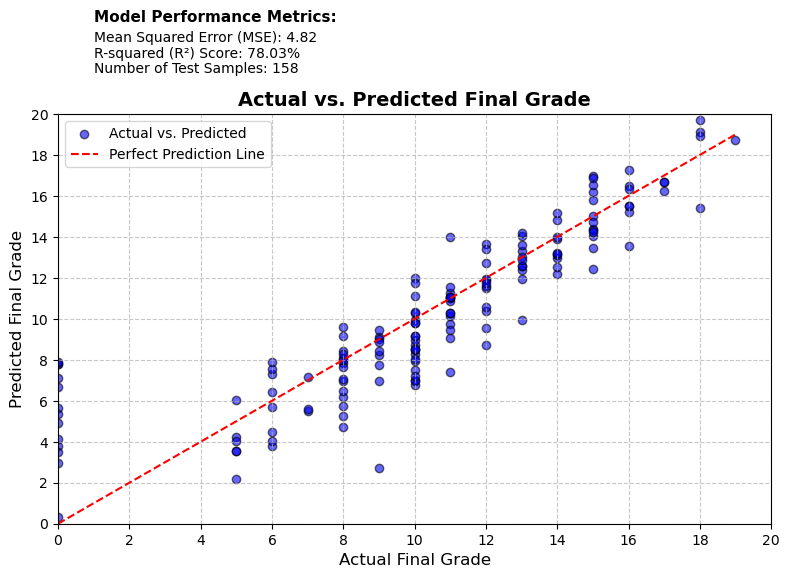

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Final Grade', fontsize=12)
plt.ylabel('Predicted Final Grade', fontsize=12)
plt.title('Actual vs. Predicted Final Grade', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 21, 2))
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.text(1, 24.5, 'Model Performance Metrics:', fontsize=11, fontweight='bold')
plt.text(1, 23.5, f'Mean Squared Error (MSE): {mse:.2f}', fontsize=10)
plt.text(1, 22.75, f'R-squared (R\u00b2) Score: {(r2 * 100):.2f}%', fontsize=10)
plt.text(1, 22, f'Number of Test Samples: {len(y_test)}', fontsize=10) 

plt.tight_layout()
plt.show()